# Aula 12 - Introdução ao Aprendizado de Máquina
## Pré-Processamento de Dados
<hr>

### Etapa 01: Inicialização

- Realizando a inicialização de bibliotecas e importações necessárias
- É possível que seja necessária a instalação por pip (ou anaconda) do ucimlrepo
- Além disso, algumas inicializações de variáveis são realizadas nessa etapa
- Base utilizada para a atividade: https://archive.ics.uci.edu/dataset/109/wine

In [2]:
pip install ucimlrepo

In [21]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine = fetch_ucirepo(id=109)

X = wine.data.features
y = wine.data.targets

# metadata
# print(wine.metadata)

# variable information
# print(wine.variables)

df = wine.data.features

num_columns = len(df.columns)


### Etapa 02: Análise inicial de dados utilizando Boxplots

- Realizando boxplots por coluna de dados
- Utiliza-se de Seaborn e Matplotlib



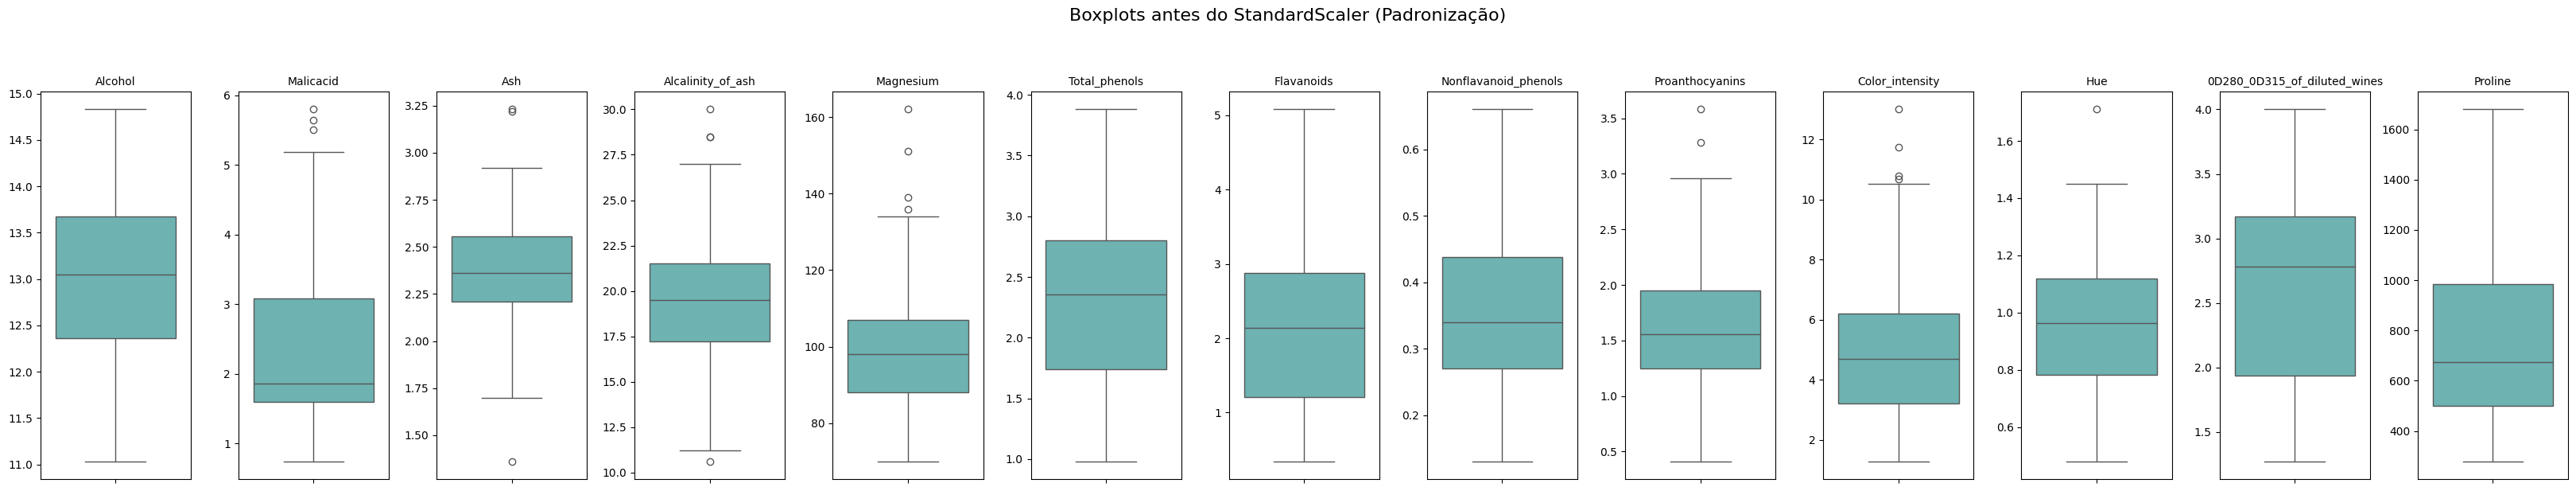

In [24]:
# a) Faça um boxplot analisando a média e desvio padrão dos valores de cada feature e se há outliers.
fig_std, axes_std = plt.subplots(nrows=1, ncols=num_columns, figsize=(num_columns * 2.5, 6))
fig_std.suptitle('Boxplots antes do StandardScaler (Padronização)', fontsize=16, y=1.02)
for i, column in enumerate(df.columns):
  sns.boxplot(ax=axes_std[i], y=df[column], color="#63BDBD")
  axes_std[i].set_title(column, fontsize=10)
  axes_std[i].set_xlabel('')
  axes_std[i].set_ylabel('')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Etapa 03: Normalização de dados e nova análise de dados

- Método de normalização de dados utilizado: Standard Scaler (Normalização Z-Score):
$$z = \frac{x - u}{s}$$

- Utilização da importação do SciKit Learn

- Nova plotagem de Boxplots, utilizando novamente Seaborn e Matplotlib

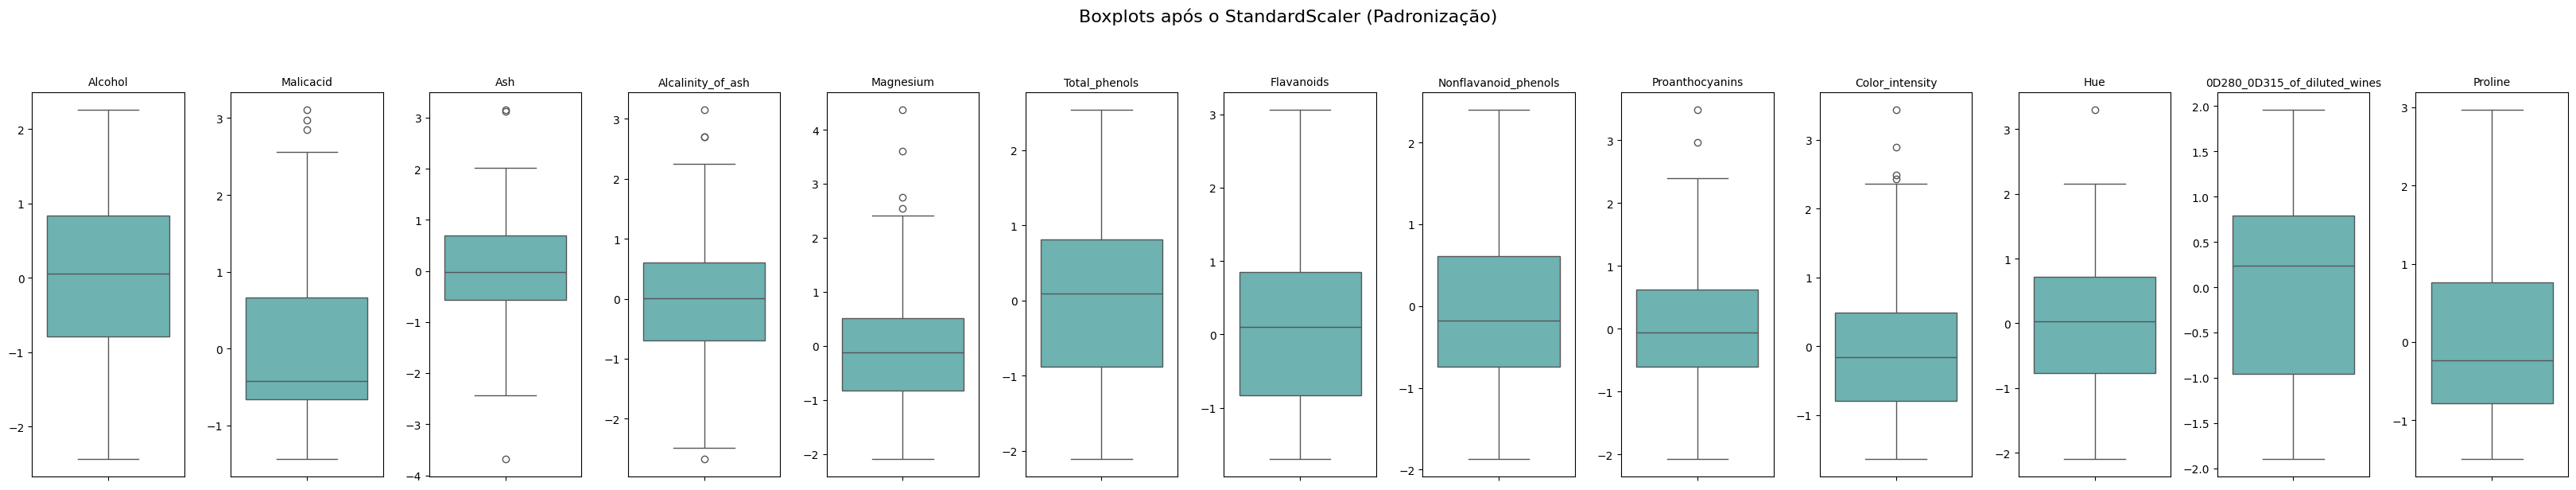

In [25]:
# b) Aplique um método de normalização dos dados e gere novamente o boxplot.
scaler_standard = StandardScaler()
df_standard_scaled_array = scaler_standard.fit_transform(df)
df_standard_scaled = pd.DataFrame(df_standard_scaled_array, columns=df.columns)

# print("\nDescrição dos dados após o StandardScaler (Média ~0, Std ~1):")
# print(df_standard_scaled.describe().T[['mean', 'std', 'min', 'max']])
# print("-" * 50)

num_columns_standard = len(df_standard_scaled.columns)
fig_std, axes_std = plt.subplots(nrows=1, ncols=num_columns_standard, figsize=(num_columns_standard * 2.5, 6))
fig_std.suptitle('Boxplots após o StandardScaler (Padronização)', fontsize=16, y=1.02)

for i, column in enumerate(df_standard_scaled.columns):
  sns.boxplot(ax=axes_std[i], y=df_standard_scaled[column], color="#63BDBD")
  axes_std[i].set_title(column, fontsize=10)
  axes_std[i].set_xlabel('')
  axes_std[i].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Etapa 04: Gráfico de distribuição de elementos por classe

- Gráfico gerado com Seaborn e Matplotlib
- Utilizado para verificar o balanceamento dos dados

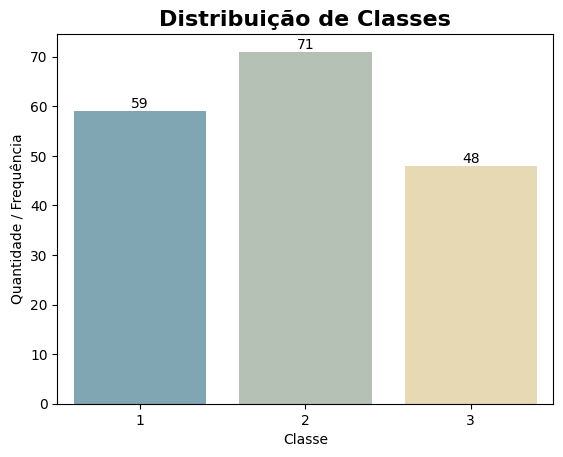

In [26]:
# c) Plote um gráfico com a distribuição de elementos em cada classe.

distribution_bars = sns.countplot(x=y.squeeze(), data=df, palette="blend:#7AB,#EDA", hue=y.squeeze(), legend=False)
for i in range(len(distribution_bars.patches)):
  distribution_bars.bar_label(distribution_bars.containers[i], fontsize=10)
plt.title('Distribuição de Classes', fontsize=16, fontweight='bold')
plt.xlabel('Classe')
plt.ylabel('Quantidade / Frequência')
# print(y.squeeze())
plt.show()

### Etapa 05: Matriz de Correlação entre features

- Matriz criada usando Seaborn e Matplotlib
- Matriz poderia ser triangular (devido às repetições, código comentado muda isso)
- É possível notar uma possível correlação positiva entre ``Total_phenols`` e ``Flavanoids``

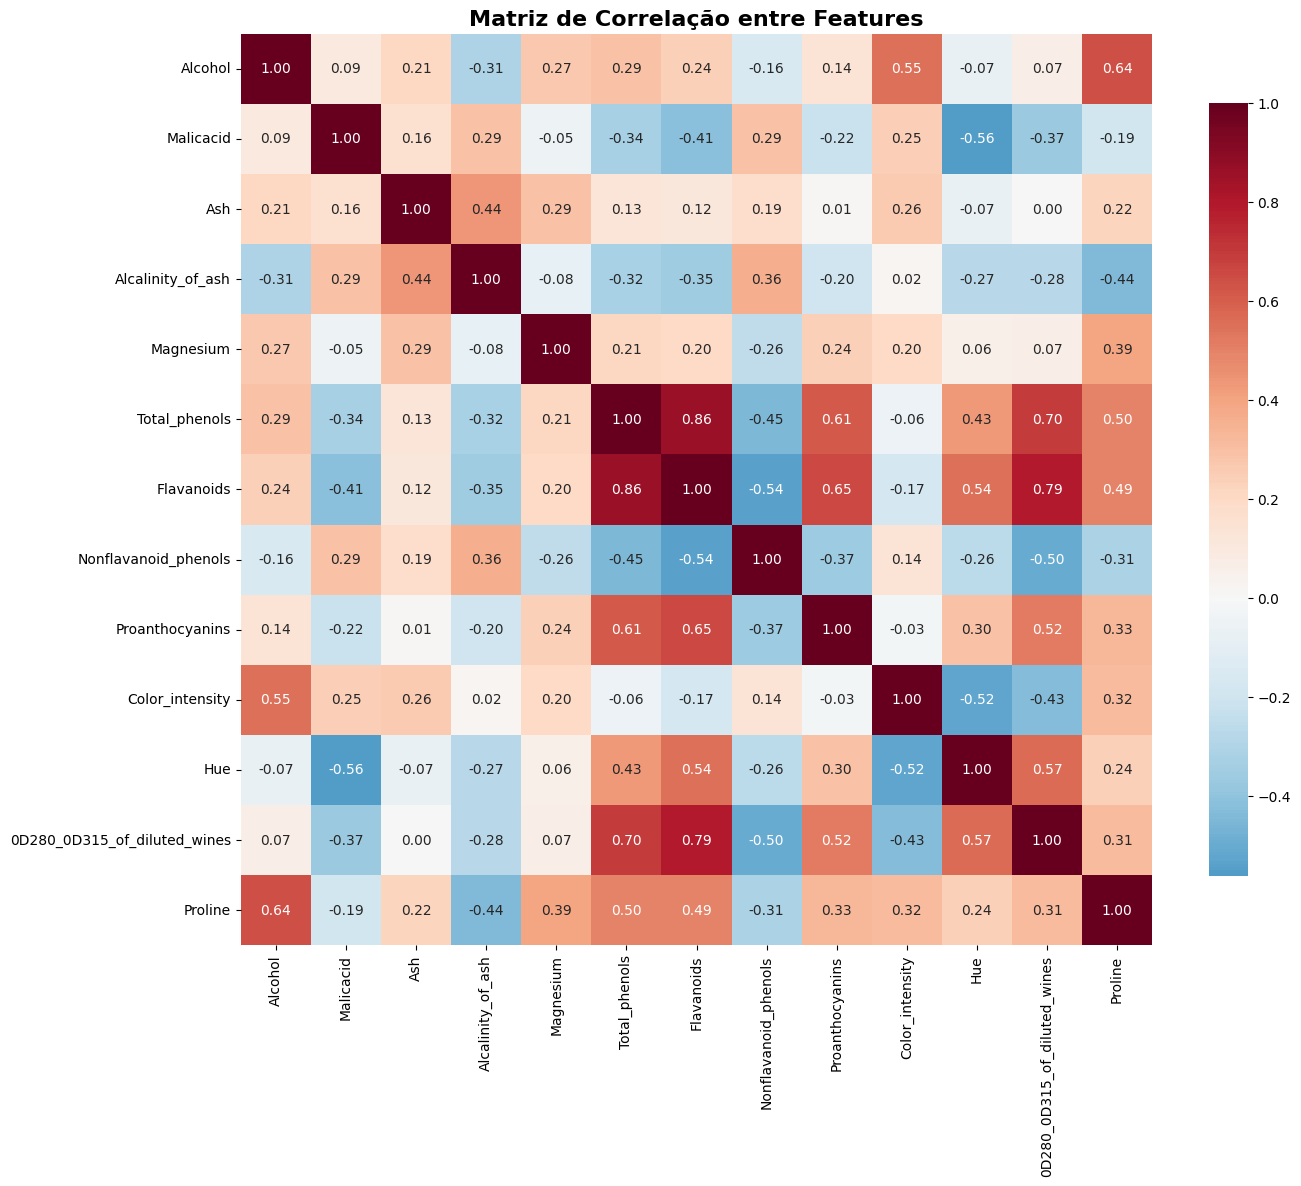

In [27]:
# d) Plote a matriz de correlação entre as features e indique quais atributos tem maior correlação entre si.

plt.figure(figsize=(14, 12))
correlation_matrix = df.corr(method="pearson")
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
#             square=True, fmt='.2f', cbar_kws={"shrink": .8})
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação entre Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Etapa 06: Plotagem de Gráfico aplicando PCA

PCA: Principal Component Analysis (em português: Análise de Componentes Principais)

- Utilizado para reduzir a dimensionalidade de dados
- Utilizando SciKitLearn para fazer o PCA
- Utilizando Seaborn e Matplotlib para plotagem do gráfico 2D

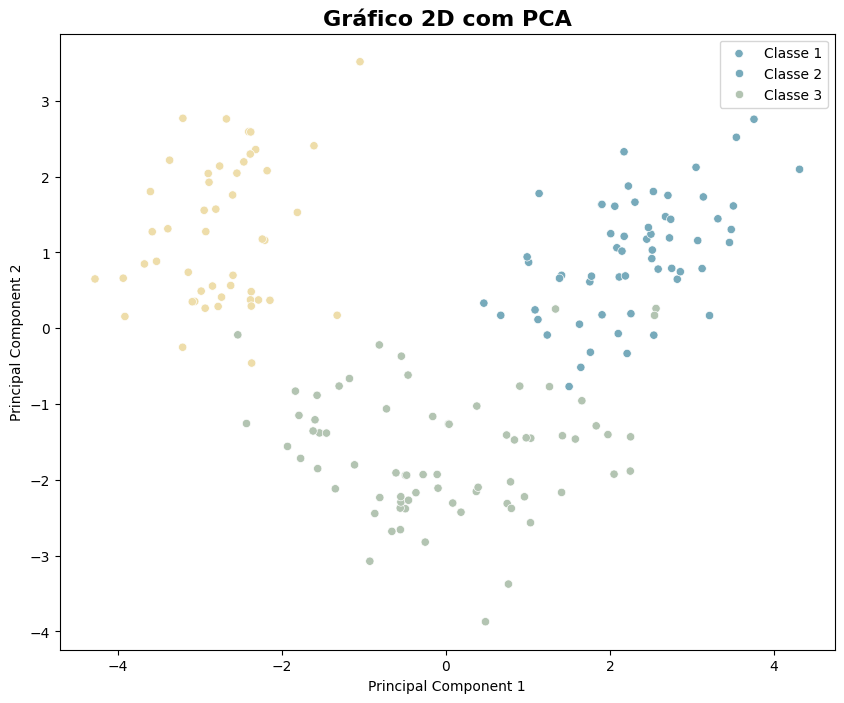

In [30]:
# e) Plote um gráfico 2D aplicando PCA.

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_standard_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y.squeeze()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette="blend:#7AB,#EDA")
plt.title('Gráfico 2D com PCA', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(["Classe 1", "Classe 2", "Classe 3"], loc='upper right')
plt.show()

# Análise de Resultados

#### A seguir, os resultados da execução do programa acima:

### 1) Faça um boxplot analisando a média e desvio padrão dos valores de cada feature e se há outliers.
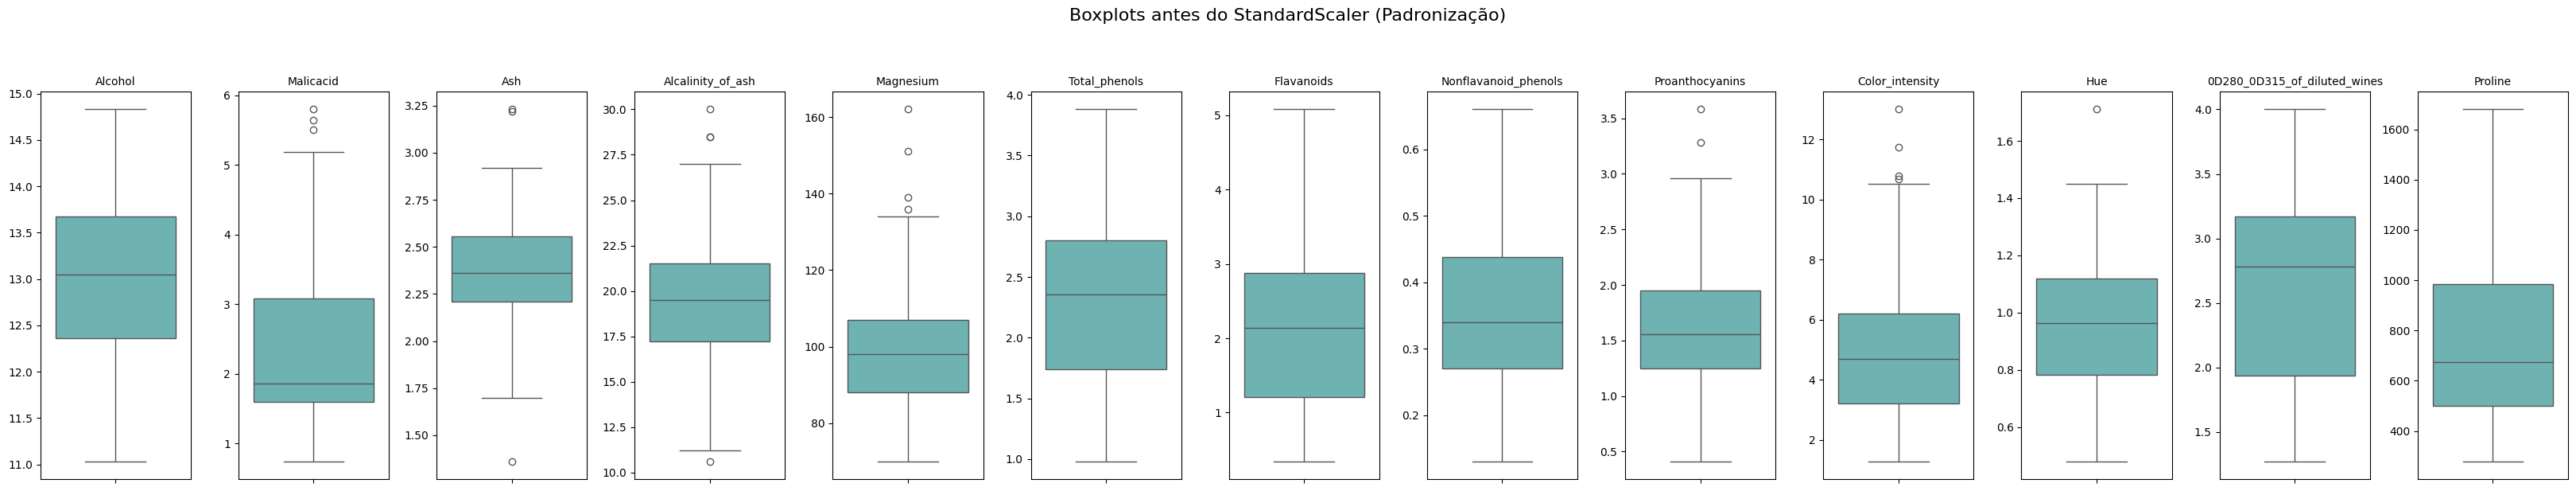
### 2) Aplique um método de normalização dos dados e gere novamente o boxplot.
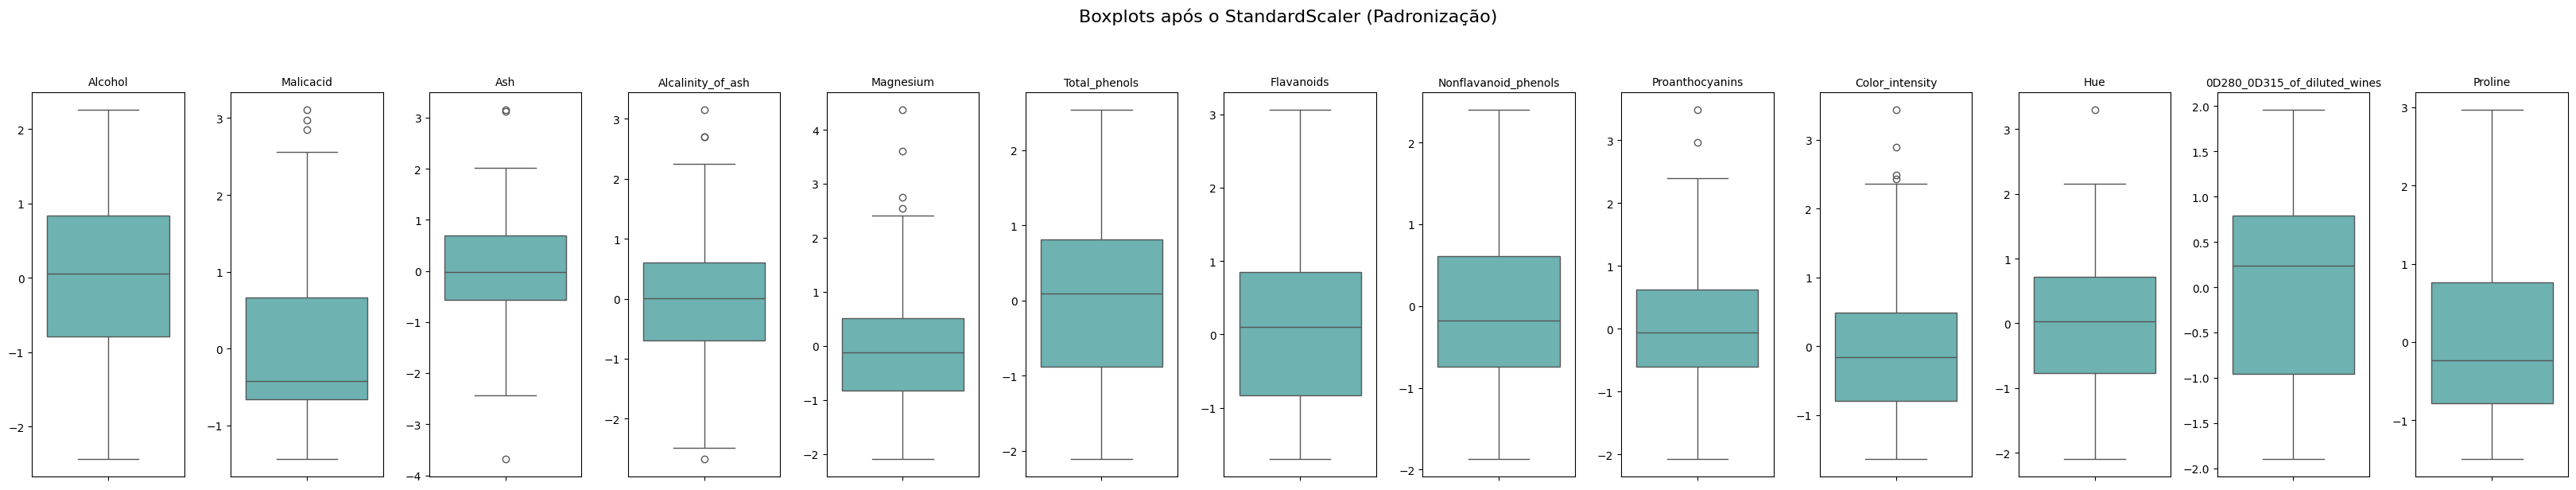

### 3) Plote um gráfico com a distribuição de elementos em cada classe.
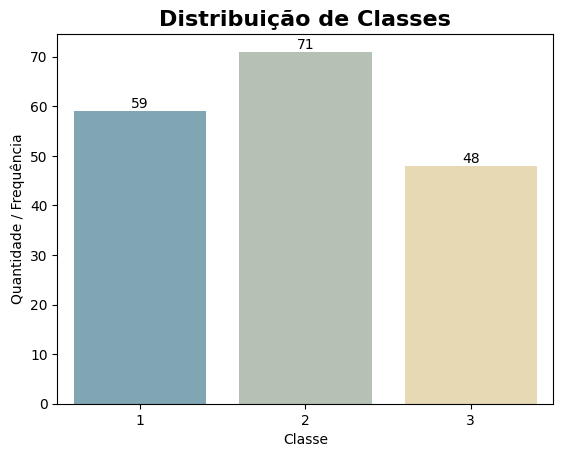

### 4) Plote a matriz de correlação entre as features e indique quais atributos tem maior correlação entre si.
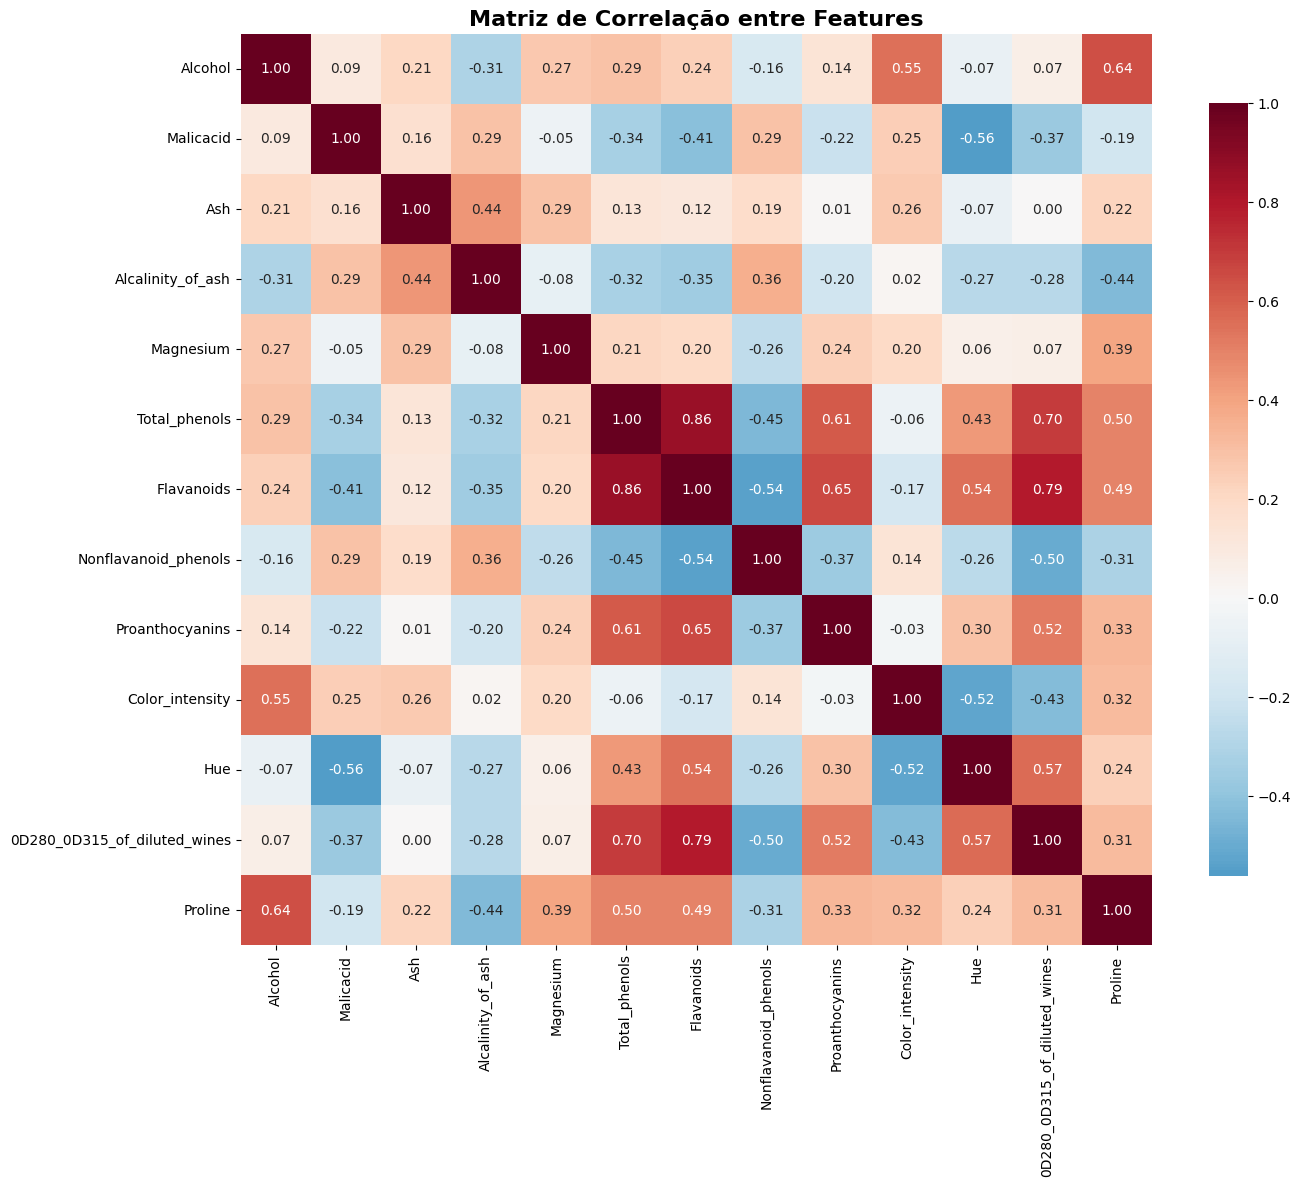

### 5) Plote um gráfico 2D aplicando PCA.

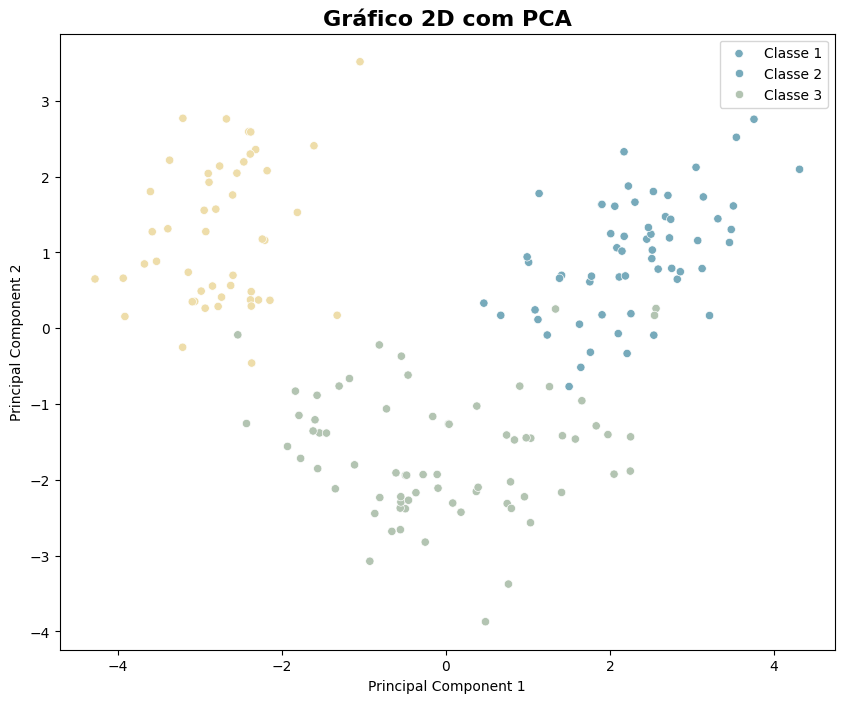